# Example2: Localization for single events

In this notebook I will show how to localize a GW event with seal.

In [1]:
import bilby
import numpy as np 
import time
import sys
import matplotlib.pyplot as plt
from multiprocessing import Pool
import multiprocessing
from functools import partial
from matplotlib.pyplot import MultipleLocator
from bilby.gw import conversion
from scipy.optimize import leastsq
import json

import sealgw
from sealgw import seal
import sealgw.calculation as sealcal

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Case I: Localizing SPIIR trigger events

Seal is going to be implemented in SPIIR, here I show how to process .xml file from SPIIR and localize it.

### Extract information and do it manually

You can extract event information from xml file and provide it to Seal manually. Same function can be used for your own GW events.

In [2]:
# Initialize Seal

seal_O2 = seal.Seal('example_outputs/sealconfig_O2_lhv.txt') # use the config we fit in example1
xml_filepath = 'example_inputs/H1L1V1_1187008882_3_806.xml'

# extract_info_from_xml returns a lot of useful data that seal needs
# return_names==True: return det names
# return_names==False: return det codes
trigger_time, ndet, ntimes_array, det_names, max_snr_array, sigma_array, time_arrays, snr_arrays =\
        sealcal.localization.extract_info_from_xml(xml_filepath, return_names=True)

#can be converted with:
#det_codes_array = sealcal.localization.get_det_code_array(det_names)

xml processing done. 
Trigger time: 1187008882.4453125
Detectors: ['H1', 'L1', 'V1']
SNRs: [15.10651112 24.52303505  1.96168923]
sigmas: [1969.1236365  1677.65263077  912.23831788]


In [3]:
########### Reload some event info because xml has some errors ###########
trigger_time = 1187008882.43
start_time = trigger_time-0.01
end_time = trigger_time+0.01
sigma_array = np.array([142*8.0,213*8.0,60*8.0])
print("Time prior and horizon are manually corrected.")
########### Delete above when xml issues are fixed ###########

Time prior and horizon are manually corrected.


In [6]:
# localize with seal. If you set timecost=False, it doesn't return timecost.

nthread = 8 # use 8 threads
max_snr = sum(snr**2 for snr in max_snr_array)
max_snr = max_snr**0.5
logprob_skymap, timecost = seal_O2.localize( det_names, time_arrays, snr_arrays, max_snr, sigma_array, ntimes_array, start_time, end_time,
         nthread,  timecost=True)

print("Timecost: ", timecost)

Timecost:  0.49904608726501465


Skymap saved to example_outputs/skymap_1.pdf


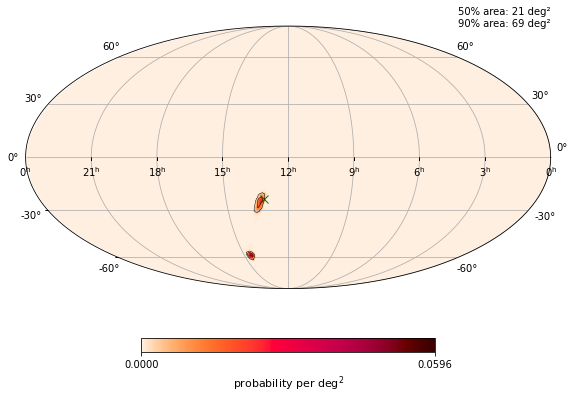

In [7]:
# plot it.
save_filename = 'example_outputs/skymap_1.pdf'
true_ra = 3.446
true_dec = -0.408
sealcal.localization.plot_skymap(logprob_skymap, save_filename=save_filename, true_ra = true_ra, true_dec = true_dec)

### Let seal do it automatically

The above process can be done by seal. It's convenient to let seal do this inside, but you cannot see what info is stored in xml.

...waiting to fix trigger time and sigma issue in xml...

## Case II: Localizing your simulation events